# Projet : Analyse des Milliardaires Mondiaux 💸

## Description :
Ce projet va nous donner un aperçu sur les personnes les plus riches du monde. En utilisant Excel, Python et Power BI, on va essayer de comprendre comment la richesse est répartie, qui sont ces milliardaires, et quelles sont les statistiques clés selon les régions et les industries. En gros, on va examiner ce qui contribue à l'accumulation des fortunes.

## Le Workflow 🤖 :

1. **Excel** 🧼: D'abord, on commence par nettoyer les données, un peu comme quand on range sa chambre à la dernière minute. On fait une exploration de base et quelques visualisations pour voir les premières tendances.

2. **Python** 🐍: Ensuite, on passe aux choses sérieuses. Avec des bibliothèques comme Pandas et Matplotlib, on va manipuler les données, faire des analyses avancées et chercher des insights plus profonds.

3. **Power BI** 📊: Pour finir, on crée un tableau de bord interactif qui permettra de naviguer facilement dans les données et d'explorer les résultats de manière dynamique.

## Objectif 🏆 :
L’objectif est d’avoir une compréhension claire et détaillée de la répartition des milliardaires à travers le monde, d'identifier les modèles de richesse, et de voir comment certains secteurs et régions contribuent à l’accumulation des fortunes. 🚀


---

---

# let's goooooooo

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy import stats
import scikit_posthocs as sp

In [2]:
df = pd.read_excel("Billionaires Data Transform .xlsx")
df

,Name,NetWorth (B),Wealth Category,Country,Source,Rank,Age,Age Group,Industry
0,Jeff Bezos,177.0,Milliardaires très riches,United States,Amazon,1,57.0,Adulte,Technology
1,Elon Musk,151.0,Milliardaires très riches,United States,"Tesla, SpaceX",2,49.0,Adulte,Automotive
2,Bernard Arnault & family,150.0,Milliardaires très riches,France,LVMH,3,72.0,Âgé,Fashion & Retail
3,Bill Gates,124.0,Milliardaires très riches,United States,Microsoft,4,65.0,Âgé,Technology
4,Mark Zuckerberg,97.0,Milliardaires très riches,United States,Facebook,5,36.0,Jeune,Technology
...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,Milliardaires jeunes,China,e-commerce,2674,49.0,Adulte,Technology
2751,Zhang Yuqiang,1.0,Milliardaires jeunes,China,Fiberglass,2674,65.0,Âgé,Manufacturing
2752,Zhao Meiguang,1.0,Milliardaires jeunes,China,gold mining,2674,58.0,Adulte,Metals & Mining
2753,Zhong Naixiong,1.0,Milliardaires jeunes,China,conglomerate,2674,58.0,Adulte,Diversified


# Explication des Colonnes du Projet d'Analyse des Milliardaires Mondiaux 📊

1. **Name**  
   Nom des milliardaires.

2. **NetWorth**  
   Valeur nette de chaque milliardaire.

3. **Country**  
   Pays d'origine des milliardaires.

4. **Source**  
   Origine de leur richesse (entreprises, investissements, etc.).

5. **Rank**  
   Rang de chaque milliardaire selon leur fortune.

6. **Age**  
   Âge des milliardaires.

7. **Industry**  
   Industrie dans laquelle chaque milliardaire opère.
onger dans les données ?


# Inspection des données : Un petit coup d'œil 👀

Avant de commencer avec nos milliardaires, on a regardé nos données de près. On veut être sûr que tout est bien en place tats :es :



---


## 1. **Des colonnes vides ?**

Voici le résumé des valeurs manquantes :

In [3]:
df.isna().sum()

Name                0
NetWorth (B)        0
Wealth Category     0
Country             0
Source              0
Rank                0
Age                79
Age Group           0
Industry            0
dtype: int64

On a trouvé un problème avec la colonne **Age**. Il manque 79 valeurs. C'est peut-être des milliardaires qui préfèrent garder leur âge secret... 

Bon, on va pas laisser ça comme ça... Il est temps de faire un peu de magie de données ! 



##  **Remplir les âges manquants avec la moyenne**

Pour éviter les problèmes, on va remplacer les âges manquants par l'âge moyen. Comme ça, tout le monde aura un âge, même ceux qui l'ont oublié ! 


In [4]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df.isna().sum()

Name               0
NetWorth (B)       0
Wealth Category    0
Country            0
Source             0
Rank               0
Age                0
Age Group          0
Industry           0
dtype: int64

---
# 2. Valeurs dupliquées
## Deuxième vérification, est-ce qu'on a des doublons ?

In [5]:
df.duplicated().sum()

0

# Résultat :
## 0 doublons ! 
- Pas de données répétées, tout est unique et bien structuré. Franchement, c’est rare qu’on ait une data aussi clean dès le départ !?

---

# 3. Infos sur les colonnes 🧐

## Un dernier coup d’œil sur les types de données et quelques stats générales

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2755 non-null   object 
 1   NetWorth (B)     2755 non-null   float64
 2   Wealth Category  2755 non-null   object 
 3   Country          2755 non-null   object 
 4   Source           2755 non-null   object 
 5   Rank             2755 non-null   int64  
 6   Age              2755 non-null   float64
 7   Age Group        2755 non-null   object 
 8   Industry         2755 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 193.8+ KB


Ce qu’on voit ici :

- **2755 entrées** : donc on a bien **2755 milliardaires** dans notre base de données. Pas mal, non ? 💰
- **9 colonnes** avec différents types de données :
  - **6 colonnes texte** (nom, pays, etc.)
  - **2 colonnes numériques avec virgule** (fortune en milliards et âge) — eh oui, on parle en milliards ici, c’est pas rien !
  - **1 colonne entière** (le classement des milliardaires, de 1 à 2755)

Tout est bien propre et prêt pour l’analyse. Alors, c’est parti pour décortiquer la richesse ! 💸


---
---

# Analyse statistique descriptive 📊

Bon, il est temps de plonger dans les chiffres et de voir ce que ces milliardaires ont dans le ventre (ou plutôt, dans leurs portefeuilles). 😄

## 1. **Statistiques générales**

On va commencer par jeter un œil aux statistiques de base des colonnes numériques : la fortune en milliards et l'âge. Ça nous donnera une idée des tendances généscribe()


In [7]:
df[['NetWorth (B)' , 'Age']].describe()

,NetWorth (B),Age
count,2755.000000,2755.000000
mean,4.749220,63.113602
std,9.615358,13.250909
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,63.000000
75%,4.200000,72.000000
max,177.000000,99.000000


## **Résultats des statistiques générales**

### Fortune en milliards (NetWorth) 💰

- **Nombre total de milliardaires** : 2755
- **Fortune moyenne** : 4,75 milliards — tranquille, non ?
- **Écart type** : 9,61 milliards — il y a de sacrées différences entre les riches !
- **Minimum** : 1 milliard — oui, oui, c'est "le plus pauvre" des milliardaires... 😅
- **25% des milliardaires** ont une fortune inférieure à 1,5 milliard.
- **La moitié (50%)** des milliardaires ont moins de 2,3 milliards.
- **75% des milliardaires** ont moins de 4,2 milliards.
- **Maximum** : 177 milliards — on se demande bien qui ça peut
être... 😎

### Âge des milliardaires 👵👶

- **Âge moyen** : 63 ans — ni trop jeunes, ni trop vieux, ils sont dans la fleur de l'âge !
- **Écart type** : 13,25 ans — les fortunes n'ont pas d'âge.
- **Minimum** : 18 ans — imaginez, déjà milliardaire à cet âge !
- **25% des milliardaires** ont moins de 54 ans.
- **La moitié (50%)** ont 63 ans — donc c'est l'âge typique d'un milliardaire.
- **75% ont moins de 72 ans**.
- **Maximum** : 99 ans — certains ne prennent pas leur retraite de milliardaire... 😄

Voilà de quoi mieux comprendre les chiffres derrière ces fortunes et ces âges ! Prêts pour la suite ? 💸


---

## . **Boxplot : Comparaison entre la fortune et l'âge**

On a ici un boxplot qui compare la **fortune** (NetWorth en milliards) et l'**âge** de nos milliardaires. Ce graphique nous permet de visualiser les données d'une manière plus simple, et de repérer les valeurs extrêmes (outliers) facilement.

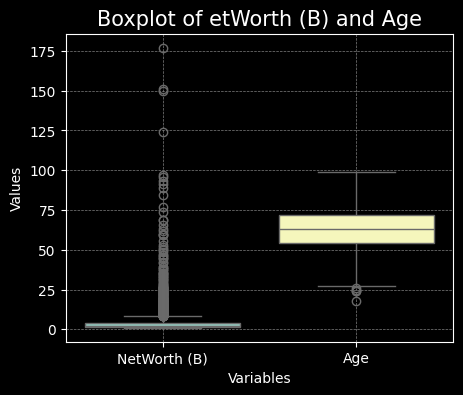

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(5, 4))  
sns.boxplot(data = df[['NetWorth (B)' , 'Age']])
plt.title('Boxplot of etWorth (B) and Age', fontsize=15)
plt.ylabel('Values')
plt.xlabel('Variables')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Ce qu'on peut voir :

- **Fortune (NetWorth)** : 
  - La majorité des milliardaires ont des fortunes concentrées autour de valeurs assez basses (en dessous de 10 milliards), mais il y a quelques chanceux qui explosent les compteurs (jusqu'à 177 milliards). On voit plusieurs points au-dessus du boxplot, qui représentent ces super-riches !
  
- **Âge** :
  - L'âge des milliardaires est plus équilibré avec un écart moins grand que la fortune. La plupart ont entre 50 et 75 ans, avec quelques exceptions plus jeunes ou plus âgées.
  
- **Outliers (valeurs extrêmes)** :
  - Il y a beaucoup de valeurs extrêmes pour la fortune, ce qui montre que certains milliardaires sont beaucoup plus riches que la majorité.
  - Pour l'âge, les valeurs sont plus concentrées, avec quelques exceptions très jeunes ou très âgées.

### Conclusion :

Ce boxplot nous montre bien l'inégalité de la répartition des richesses parmi les milliardaires, tandis que l'âge semble un peu plus stable. 💰👴👶


---

# 🚀 Analyse de la distribution des données : La quête du naturel ! 

Pour vérifier si nos données sont bien dans le monde du **normal**, nous allons utiliser trois techniques : **test de Shapiro-Wilk**, **histogramme**, et **QQ-Plot**. Prêts pour l’aventure ?

## 1. **Test de Shapiro-Wilk** 🕵️‍♂️

Nous allons tester :

- **Fortune (NetWorth)** : Sont-ils riches comme Crésus ?
- **Âge** : Sont-ils dans le club des anciens ou des jeunes ?

### Interprétation :
- **p-value < 0,05** : Nos données ne sont pas normales.
- **p-value > 0,05** : Tout va bien, mais pas tout à fait !

## 2. **Histogramme** 📊

Voyons le selfie de nos données !

- **Fortune** : Les riches se regroupent-ils autour d’une certaine valeur ?
- **Âge** : Tous du même âge ou pas ?

### Interprétation :
- **Distribution normale** : Une belle courbe en forme de cloche.
- **Asymétrique** : Des choses étranges se passent !

## 3. **QQ-Plot** 📈

Un radar pour comparer nos données avec le normal.

- **Fortune et Âge** : Les points s'alignent-ils sur la droite ?

### Interprétation :
- **Points alignés** : Youpi, nos données sont normales !
- **Points écartés** : Oups, il y a du travail à faire !

---

Avec ces trois méthodes, nous allons bien comprendre la distribution de nos données et choisir les bons tests statistiques par la suite. Prêts à partir ? 🎢
 statistiques à utiliser par la suite.


## *1. Shapiro-Wilk pour l'Âge*

In [9]:
stat , p_value = stats.shapiro(df['Age'])
print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("Age suit une distribution normale (ne pas rejeter H0)")
else:
    print("Age ne suit pas une distribution normale (rejeter H0)")

Statistic: 0.9964844974004416, P-value: 4.902672563172394e-06
Age ne suit pas une distribution normale (rejeter H0)


### Analyse rapide
La **P-value** (4.90e-06) est tellement inférieure à **α = 0.05** qu'elle semble avoir pris un raccourci ! Cela signifie que l'âge des milliardaires ne suit **pas** une distribution normale. En gros, on a une belle diversité d'âges, ce qui pourrait expliquer pourquoi certains milliardaires agissent comme des adolescents ! 😄


## 2. *Histogramme*

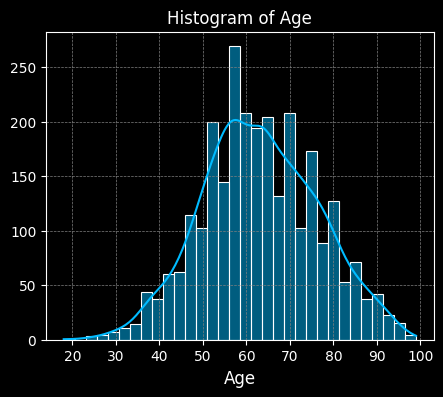

In [10]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Age', kde=True, color='#00bbff')
plt.title('Histogram of Age')
plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

Alors, après avoir tracé l'histogramme, surprise ! On dirait bien qu'il a décidé de faire un clin d'œil à une distribution normale avec sa belle courbe en cloche. 🎉 Mais attendez, ne mettons pas la charrue avant les bœufs !

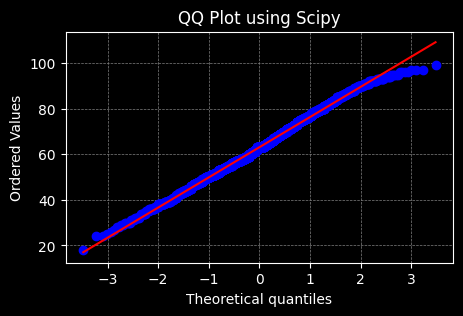

In [11]:
data = df['Age']
plt.figure(figsize = (5,3))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()



Ensuite, le QQ-Plot est arrivé sur scène, et il a commencé à aligner presque tous les points sur la ligne droite, comme s'ils suivaient un code secret. 📏 Mais là, quelques points à la fin se sont dit : "Non merci, nous préférons être différents !" Ces points isolés pourraient indiquer des valeurs extrêmes qui se moquent un peu de la norme.


### Conclusion
En résumé, même si l'histogramme et le QQ-Plot donnent l'impression d'une distribution normale, ces petits rebelles à la fin nous rappellent que la normalité est parfois un concept relatif. Peut-être que nos milliardaires ont quelques surprises cachées dans leurs âges ! 😄

## Interprétation du Skewness et Kurtosis pour l'Âge a encore des secrets à découvrir ! 😄


In [12]:

skewness = stats.skew(df['Age'])
kurtosis = stats.kurtosis(df['Age'])

print(f'skewness: {skewness}')
print(f'kurtosis: {kurtosis}')


skewness: 0.04626435977262172
kurtosis: -0.3042403080678664



## Résumé des Résultats du Skewness et Kurtosis pour l'Âge

Après nos calculs, voici ce que nous avons trouvé pour l'âge des milliardaires :

- **Inflexion (Skewness)** : **0.0463**
- **Taux de plat (Kurtosis)** : **-0.3042**


### Qu'est-ce que ça veut dire ?


#### Inflexion (Skewness)
- **0.0463** : C’est presque comme si l'âge disait "Regardez-moi, je suis presque parfait !" Cela signifie que la distribution de l'âge est presque **symétrique**. En d'autres termes, il n'y a pas trop de milliardaires très vieux ou très jeunes. C'est un peu comme une fête d'anniversaire où tout le monde a à peu près le même âge — pas de surprises ici !

#### Taux de plat (Kurtosis)
- **-0.3042** : Ah, voilà un chiffre intéressant ! Cela indique que notre distribution a moins de valeurs extrêmes que ce que l'on attend normalement. Imaginez une bande de milliardaires qui sont tous assez semblables, sans trop de "cas extrêmes". C’est comme une équipe de foot où tout le monde joue bien, sans superstar qui fait le show. 😄

### En gros
L'âge des milliardaires est assez normal, pas trop de décalage, pas trop de surprises. Ils semblent tous se comporter comme des gens « normaux » (dans le sens où ils ont tous à peu près le même âge). Qui sait, peut-être qu'ils ont un secret pour rester jeunes d'esprit, ou peut-être qu'ils investissent dans des crèmes anti-âge ?! 
ardaires, l'âge a une tendance à se comporter de manière « conventionnelle » — mais qui sait, peut-être qu'il y a encore des secrets à découvrir ! 

---

## Réflexion sur les Résultats Contradictoires

On a un petit mystère dans notre analyse de l'âge des milliardaires ! Voici ce qu’on a trouvé :

1. **Test de Shapiro-Wilk** : Ce test a donné une **P-value** plus petite que **α = 0.05**. Ça veut dire qu'on doit dire "Au revoir !" à l'idée que l'âge suit une distribution normale.

2. **Histogramme** : Mais attendez ! Notre histogramme ressemble à une belle cloche. Ça veut dire que les âges sont bien répartis, comme une fête où tout le monde danse à la même heure.

3. **QQ-Plot** : Et là, le QQ-Plot nous montre que la plupart des points sont bien alignés sur la ligne droite. C'est comme si tout le monde était à la bonne place, avec juste quelques invités qui arrivent en retard !

4. **Inflexion (Skewness)** : Avec une valeur de **0.0463**, l'âge est presque symétrique. Ça veut dire que les milliardaires ne sont ni trop vieux ni trop jeunes. Un bel équilibre !

5. **Taux de plat (Kurtosis)** : La valeur de **-0.3042** montre qu'il n'y a pas trop de valeurs extrêmes. C'est comme une bande de milliardaires qui se ressemble, sans trop de surprises.

### Que faire alors ?
- **Interprétation des Résultats** : Ces petites contradictions arrivent parfois en statistique. Le test de Shapiro-Wilk peut être un peu trop sensible, surtout avec beaucoup de données. Mais nos jolies visualisations, comme l'histogramme et le QQ-Plot, ainsi que nos mesures d'inflexion et de platitude, disent presque le contraire.

### Conclusion
Alors, que faire ? Même si le test dit "Non, pas normal !", nos autres analyses suggèrent qu'on peut quand même utiliser des analyses paramétriques. Peut-être que les milliardaires ont un secret pour rester "normaux", même si les tests disent le contraire ! 😄


## Analyse de la Distribution de la Fortune (NetWorth)

### 1. Test de Shapiro-Wilk

In [13]:
stat , p_value = stats.shapiro(df['NetWorth (B)'])

print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("NetWorth suit une distribution normale (ne pas rejeter H0)")
else:
    print("NetWorth ne suit pas une distribution normale (rejeter H0)")

Statistic: 0.33170859597755864, P-value: 3.8868456818900727e-72
NetWorth ne suit pas une distribution normale (rejeter H0)


- **Statistic** : **0.3317**
- **P-value** : **3.8868e-72** (c'est-à-dire très, très petit)
- **Conclusion** : Avec une p-value aussi petite, il est clair que nous devons **rejeter l'hypothèse nulle**. Autrement dit, la fortune des milliardaires **ne suit pas** une distribution normale. Eh oui, il semblerait que la richesse ne soit pas aussi bien répartie que l'âge !

### 2. Histogramme

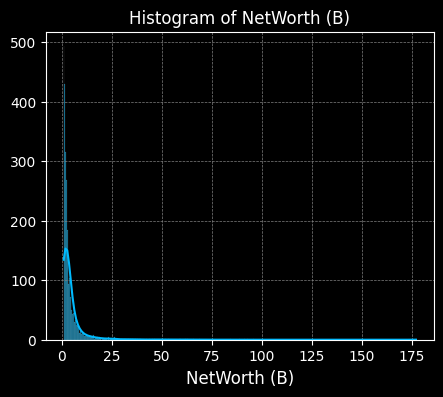

In [14]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='NetWorth (B)', kde=True, color='#00bbff')
plt.title('Histogram of NetWorth (B)')
plt.xlabel('NetWorth (B)', fontsize=12, color='white')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

- L'histogramme montre clairement que la distribution n'est **pas normale du tout**. Il commence très haut, puis chute brusquement, et finit par se stabiliser très bas. On dirait un toboggan qui commence par une descente vertigineuse avant de s'aplatir. Bref, la richesse n’est pas pour tout le monde… et ça se voit !

### 3. QQ-Plot

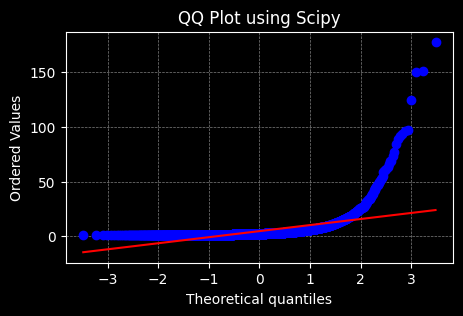

In [15]:
data = df['NetWorth (B)']
plt.figure(figsize = (5,3))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

- Sur le QQ-Plot, les points commencent par une belle descente, se stabilisent un peu au milieu, puis finissent par **dire "bye-bye" à la ligne droite**. Ce qui confirme encore une fois que la distribution de la fortune est loin d'être normale. Apparemment, les milliardaires aiment sortir des lignes !

### Conclusion
Il est évident que la fortune des milliardaires ne suit **pas du tout** une distribution normale. Entre l'histogramme en mode toboggan et le QQ-Plot où les points se rebellent, on comprend bien que la richesse est concentrée chez quelques-uns, sans aucune symétrie ni normalité. C'est un peu comme si les riches disaient : "La normalité, c'est pour les autres !" 😄

---

 # 🚀 Analyse avancée de la richesse et de l'âge

Maintenant qu'on a une idée sur la nature des données (distribution normale ou pas), on va passer à l'analyse avancée pour découvrir des informations plus profondes🤓

## Objectif :
On va utiliser des **tests non paramétriques** et **paramétriques** en fonction de la nature de chaque variable. On se concentre surtout sur la comparaison entre différentes groupes, comme les industries et les pays. Comment se répartissent l'âge et la richesse entre eux ? Y a-t-il des différences significatives ?

Préparez-vous, parce que notre analyse va devenir plus complexe mais aussi plus passion ! 😎🔍


# Analyse des différences de richesse selon l'industrie

Vu que la richesse n'est pas normalement distribuée, on va utiliser des **tests non paramétriques** :

1. **Test de Kruskal-Wallis** : Pour vérifier s'il y a des différences de richesse entre les groupes (industries ou pays).

2. **Test de Dunn** (si nécessaire) : Pour identifier les groupes spécifiques avec des différences significatives, en utilisant une **correction de Bonferroni**.

Ce plan nous aidera à comprendre les différences de richesse entre les groupes. 


In [16]:
import scipy.stats as stats
import scikit_posthocs as sp

grouped_data = df.groupby('Industry')['NetWorth (B)']

industry_networth = [group for name, group in grouped_data]

stat, p_value = stats.kruskal(*industry_networth)
print(f'Statistic: {stat}, P-value: {p_value}')

alpha = 0.05
if p_value < alpha: 
    print('Reject H0 - Différences significatives entre les groupes')
    dunn_results = sp.posthoc_dunn(industry_networth, p_adjust='bonferroni')
    print('Résultats du test de Dunn :')
    print(dunn_results)
else: 
    print('Not Reject H0 - Pas de différences significatives entre les groupes')


Statistic: 34.72587478400973, P-value: 0.006757539245863811
Reject H0 - Différences significatives entre les groupes
Résultats du test de Dunn :
          1         2    3    4         5    6    7    8    9    10        11  \
1   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
2   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
3   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
4   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
5   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  0.759523   
6   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
7   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
8   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
9   1.000000  1.000000  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.000000   
10  1.000000  1.000000  1.0  1.0  1.000000  1

In [17]:
groups = df['Industry'].unique()
groups_df = pd.DataFrame(groups, columns=['Industry']).reset_index(drop=True)
print(groups_df)

                      Industry
0                   Technology
1                   Automotive
2             Fashion & Retail
3        Finance & Investments
4                  Diversified
5              Food & Beverage
6                      Telecom
7        Media & Entertainment
8                      Service
9           Gambling & Casinos
10               Manufacturing
11                 Real Estate
12             Metals & Mining
13                      Energy
14                   Logistics
15                  Healthcare
16  Construction & Engineering
17                      Sports


<Axes: >

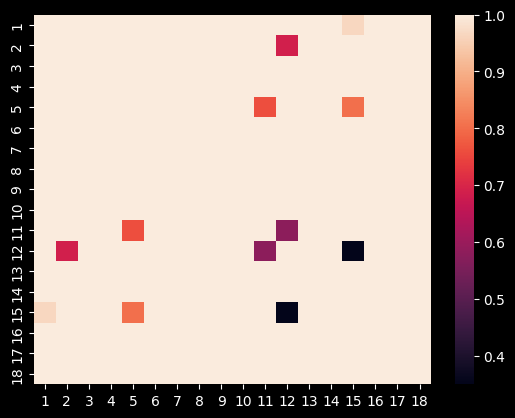

In [18]:
sns.heatmap(data = dunn_results )

### Quelle industrie compte le plus de milliardaires ? 🏭.
paire d'industries.*


In [19]:
milliardaires_industrie = df.groupby('Industry')['Name'].size().reset_index(name = 'Total').sort_values(by = 'Total' , ascending = False)
milliardaires_industrie=milliardaires_industrie.head(1)
milliardaires_industrie

,Industry,Total
5,Finance & Investments,371


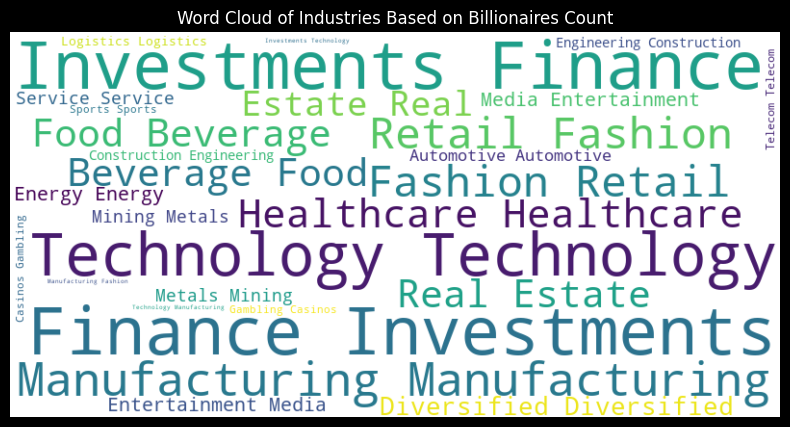

In [20]:
from wordcloud import WordCloud
milliardaires_industrie = df['Industry'].value_counts()
text = ' '.join([industry for industry, count in milliardaires_industrie.items() for _ in range(count)])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Industries Based on Billionaires Count')
plt.show()

L'industrie qui compte le plus grand nombre de milliardaires est **Finance & Investments**, avec un total de **371** milliardaires. 💰📈

# Combien y a-t-il de milliardaires dans chaque pays ? 🌍 Top 10 des pays

In [21]:
pays = df.groupby('Country')['Name'].size()
pays = pays.reset_index(name = 'Total')
pays = pays.sort_values(by='Total', ascending=False)
top_10_pays = pays.head(10)
top_10_pays

,Country,Total
66,United States,724
8,China,626
24,India,140
18,Germany,136
50,Russia,118
21,Hong Kong,71
5,Brazil,65
6,Canada,64
65,United Kingdom,56
28,Italy,51


Voici les 10 pays avec le plus grand nombre de milliardaires :

1. **États-Unis** : 724 milliardaires
2. **Chine** : 626 milliardaires
3. **Inde** : 140 milliardaires
4. **Allemagne** : 136 milliardaires
5. **Russie** : 118 milliardaires
6. **Hong Kong** : 71 milliardaires
7. **Brésil** : 65 milliardaires
8. **Canada** : 64 milliardaires
9. **Royaume-Uni** : 56 milliardaires
10. **Italie** : 51 milliardaires

# Quelle est la fortune moyenne dans chaque pays ? 💰

In [22]:
moyenne_pays = df.groupby('Country')['NetWorth (B)'].mean()
moyenne_pays = moyenne_pays.reset_index(name='Moyenne_Fortune')
moyenne_pays = moyenne_pays.sort_values(by='Moyenne_Fortune', ascending=False)
top_10_moyenne_pays = moyenne_pays.head(10)
top_10_moyenne_pays

,Country,Moyenne_Fortune
16,France,12.195238
35,Mexico,10.469231
41,Nigeria,7.500000
21,Hong Kong,6.312676
12,Denmark,6.130000
66,United States,6.075138
51,Singapore,5.811111
40,New Zealand,5.550000
32,Liechtenstein,5.500000
9,Colombia,5.240000


Voici les 10 pays avec la fortune moyenne la plus élevée :


1. **France** : 12,20 milliards 
2. **Mexique** : 10,47 milliards 
3. **Nigéria** : 7,50 milliards 
4. **Hong Kong** : 6,31 milliards 
5. **Danemark** : 6,13 milliards 
6. **États-Unis** : 6,08 milliards 
7. **Singapour** : 5,81 milliards 
8. **Nouvelle-Zélande** : 5,55 milliards 
9. **Liechtenstein** : 5,50 milliards 
10. **Colombie** : 5,24 milliards 

# Qui est le milliardaire le plus riche dans chaque pays ? 👑

In [23]:
plus_riche_par_pays = df.loc[df.groupby('Country')['NetWorth (B)'].idxmax()]
plus_riche_par_pays = plus_riche_par_pays.sort_values(by='NetWorth (B)', ascending=False)
top_10_riches = plus_riche_par_pays.head(10)
top_10_riches[['Name', 'Country', 'NetWorth (B)']].reset_index()

,index,Name,Country,NetWorth (B)
0,0,Jeff Bezos,United States,177.0
1,2,Bernard Arnault & family,France,150.0
2,9,Mukesh Ambani,India,84.5
3,10,Amancio Ortega,Spain,77.0
4,12,Zhong Shanshan,China,68.9
5,15,Carlos Slim Helu & family,Mexico,62.8
6,28,Masayoshi Son,Japan,45.4
7,32,David Thomson & family,Canada,41.8
8,33,Beate Heister & Karl Albrecht Jr.,Germany,39.2
9,39,Giovanni Ferrero,Italy,35.1


Bon, on s'intéresse aux géants de la fortune. Voici le top 10 des milliardaires les plus riches dans leurs pays respectifs :
1. **Jeff Bezos** (États-Unis) : 177,0 milliards 
2. **Bernard Arnault & famille** (France) : 150,0 milliards 
3. **Mukesh Ambani** (Inde) : 84,5 milliards 
4. **Amancio Ortega** (Espagne) : 77,0 milliards 
5. **Zhong Shanshan** (Chine) : 68,9 milliards 
6. **Carlos Slim Helu & famille** (Mexique) : 62,8 milliards 
7. **Masayoshi Son** (Japon) : 45,4 milliards 
8. **David Thomson & famille** (Canada) : 41,8 milliards 
9. **Beate Heister & Karl Albrecht Jr.** (Allemagne) : 39,2 milliards 
10. **Giovanni Ferrero** (Italie) : 35,1 milliards 

Alors, clairement, Jeff Bezos ne manque pas d'argent de poche... 


# Combien de milliardaires sont jeunes en âge ? 🎂

In [24]:
milliardaire_jeunes = df[df['Age Group'] == 'Jeune'].shape[0]
milliardaire_jeunes

185

Saviez-vous qu'il y a **185 milliardaires jeunes** dans notre liste ? C'est impressionnant de voir autant de jeunes qui ont déjà conquis le monde avec leur fortune !💸


# Qui est le plus jeune milliardaire au monde ? 👶

In [25]:
plus_jeune_milliardaire  = df[df['Age Group'] == 'Jeune'].reset_index()
plus_jeune_milliardaire=plus_jeune_milliardaire.head(1)
plus_jeune_milliardaire

,index,Name,NetWorth (B),Wealth Category,Country,Source,Rank,Age,Age Group,Industry
0,4,Mark Zuckerberg,97.0,Milliardaires très riches,United States,Facebook,5,36.0,Jeune,Technology




Le titre du plus jeune milliardaire revient à **Mark Zuckerberg**, avec une fortune de **97 milliards de dollars** ! Ce jeune entrepreneur, âgé de **36 ans**, a fait sa marque grâce à **Facebook**. Qui aurait cru qu'un simple réseau social pourrait mener à une telle richesse ? 💻💰


# Combien de milliardaires ont la même source de richesse ? 💼

In [26]:
meme_source = df.groupby('Source').agg({'Name': 'size', 'NetWorth (B)': 'sum'})
meme_source = meme_source.reset_index()
meme_source.columns = ['Source', 'Total_Millionair', 'Total_NetWorth']
meme_source = meme_source.sort_values(by='Total_Millionair', ascending=False)
meme_source.head(10)

,Source,Total_Millionair,Total_NetWorth
728,real estate,171,686.1
690,pharmaceuticals,99,335.3
520,investments,90,339.2
350,diversified,85,378.2
800,software,62,275.8
751,retail,47,159.9
474,hedge funds,42,240.1
720,private equity,35,124.0
319,consumer goods,32,88.5
272,chemicals,32,106.4


Quand on regarde d'où viennent les milliards, on remarque que **l'immobilier** est en tête avec **171 milliardaires**, accumulant une fortune totale de **686,1 milliards de dollars**. 🏠🤑

Ensuite, les **pharmaceutiques** ont contribué à créer **99 milliardaires** avec une valeur nette collective de **335,3 milliards**. 💊💸 Comme quoi, la santé paie bien, surtout quand on parle de milliards.

En troisième place, les **investissements** ont permis à **90 personnes** de rejoindre le club très sélect des milliardaires, avec une fortune totale de **339,2 milliards**. 📈💼 Parce qu'investir intelligemment, ça rapporte beaucoup !

Le top continue avec des secteurs variés comme les **biens de consommation** et les **fonds spéculatifs**, mais il est clair que certains domaines créent des fortunes plus massives que d'autres. 💵🚀


# Quelle est la relation entre l'âge et la fortune ? 📊

In [27]:
correlation_spearman = df[['NetWorth (B)', 'Age']].corr(method='spearman')
correlation_spearman

,NetWorth (B),Age
NetWorth (B),1.000000,0.103436
Age,0.103436,1.000000


### Quelle est la relation entre l'âge et la fortune selon Spearman ? 📈
Comme tu l'as bien noté, vu que l'âge suit une distribution normale et que la fortune... eh bien, disons qu'elle ne suit que les caprices des milliardaires, nous avons utilisé la corrélation de Spearman. Le résultat est de 0.10.

En d'autres termes, que tu sois un jeune prodige ou un vieux sage, la fortune ne dépend pas de tes années, mais plutôt de tes idées, ton travail, et bien sûr... un peu de chance (ou des bonnes relations familials).

# Quel est le rang moyen des milliardaires selon l'âge ? 🏅

In [28]:
quartiles_fortune_age = df.groupby('Age Group')['NetWorth (B)'].describe().reset_index()

quartiles_fortune_age

,Age Group,count,mean,std,min,25%,50%,75%,max
0,Adulte,1110.0,4.449369,9.770549,1.0,1.4,2.2,3.9,177.0
1,Jeune,185.0,4.438919,8.251344,1.0,1.5,2.3,4.0,97.0
2,Âgé,1460.0,5.016507,9.654864,1.0,1.6,2.5,4.6,150.0


Bon, on a fait un peu de maths sur nos milliardaires en les classant par âge, et voilà ce qu'on a trouvé. On a trois groupes : les jeunes, les adultes, et les... disons, expérimentés.

- **Les adultes** sont à peu près partout. Ils ont une fortune médiane de **2.2 milliards**, avec un quart de chance d’avoir plus de **3.9 milliards**. Bref, c'est la catégorie « tranquille mais blindée ».

- **Les jeunes** ? Eux, ils ont une médiane de **2.3 milliards**, légèrement mieux que les adultes, avec un petit air de « startup dans l'âme ». Et ouais, ils sont ambitieux, surtout avec un quart qui frôle les **4 milliards** !

- **Les plus âgés**, quant à eux, ont un peu plus en moyenne, mais la fortune semble se calmer au-dessus de **2.5 milliards**. Peut-être parce que... après un moment, que peut-on bien acheter de plus ?

En résumé, tout le monde est ultra-riche, mais la différence entre les jeunes et les adultes est infime, tandis que nos aînés ont une petite avance, mais pas spectaculaire.

# Qui sont les 10 milliardaires les plus riches ? 👑

In [29]:
top_10_milliardaires = df[['Name', 'NetWorth (B)']].head(10)
top_10_milliardaires

,Name,NetWorth (B)
0,Jeff Bezos,177.0
1,Elon Musk,151.0
2,Bernard Arnault & family,150.0
3,Bill Gates,124.0
4,Mark Zuckerberg,97.0
5,Warren Buffett,96.0
6,Larry Ellison,93.0
7,Larry Page,91.5
8,Sergey Brin,89.0
9,Mukesh Ambani,84.5



Accrochez-vous, on va parler des gros poissons du monde des milliardaires ! Voici le top 10 des personnes qui ont plus d'argent que certains pays :

1. **Jeff Bezos** - **177.0 milliards $** : L'homme derrière Amazon, il peut littéralement s'acheter un pays... ou deux !
   
2. **Elon Musk** - **151.0 milliards $** : Le roi des technologies et des voitures électriques. Si quelqu'un peut acheter Mars, c'est bien lui.

3. **Bernard Arnault & family** - **150.0 milliards $** : Le patron de LVMH, il fait briller le luxe comme personne.

4. **Bill Gates** - **124.0 milliards $** : Le fondateur de Microsoft, un gars qui a révolutionné notre rapport à l'informatique et à la philanthropie.

5. **Mark Zuckerberg** - **97.0 milliards $** : Le créateur de Facebook, il sait comment connecter le monde entier... et récolter des données.

6. **Warren Buffett** - **96.0 milliards $** : Le sage des investissements, il est connu pour sa patience et sa sagesse financière.

7. **Larry Ellison** - **93.0 milliards $** : Le fondateur d'Oracle, il a su tirer parti de la révolution technologique.

8. **Larry Page** - **91.5 milliards $** : Un des co-fondateurs de Google, il a mis le monde à portée de clic.

9. **Sergey Brin** - **89.0 milliards $** : L'autre co-fondateur de Google, il a aidé à bâtir le géant de la recherche en ligne.

10. **Mukesh Ambani** - **84.5 milliards $** : Le magnat indien des télécommunications et de l'énergie, avec une présence énorme en Asie.

Alors, qui aurait cru que l'argent pouvait autant lier ces personnalités ? Ils sont riches, influents et, avouons-le, un peu fascinants !


# Quelles industries ont les plus jeunes milliardaires ? 

In [30]:
jeunes_par_industrie = df[df['Age Group'] == 'Jeune'].groupby('Source')['Name'].count().reset_index(name='Nombre de Jeunes Milliardaires').sort_values(by='Nombre de Jeunes Milliardaires',ascending=False)
jeunes_par_industrie = jeunes_par_industrie.head(10)
jeunes_par_industrie

,Source,Nombre de Jeunes Milliardaires
51,fintech,8
39,diversified,8
90,real estate,6
66,investments,5
27,building materials,4
69,medical technology,4
36,cryptocurrency,4
0,Airbnb,3
117,video streaming app,3
105,soy sauce,3


### Quelles industries ont les plus jeunes milliardaires ? 

Il est temps de découvrir où se cachent les jeunes milliardaires ! Voici les industries qui abritent les plus de jeunes pousses en termes de richesse :

1. **Fintech** - **8 jeunes milliardaires** : Ces pros de la finance technologique savent comment faire fructifier leur argent, et ils n'ont même pas besoin de porter un costume-cravate.

2. **Diversified** - **8 jeunes milliardaires** : Un peu de tout, un peu de rien. Ces jeunes sont des touche-à-tout qui investissent dans plusieurs domaines à la fois.

3. **Immobilier (Real Estate)** - **6 jeunes milliardaires** : Ils ont trouvé le secret de l'immobilier et savent qu'un bon investissement peut rapporter gros.

4. **Investissements** - **5 jeunes milliardaires** : Ces stratèges de l'argent jonglent avec les chiffres pour bâtir leur empire financier.

5. **Matériaux de construction (Building Materials)** - **4 jeunes milliardaires** : Ils sont la clé de la construction moderne, et leur richesse monte en flèche.

6. **Technologie médicale (Medical Technology)** - **4 jeunes milliardaires** : Ces innovateurs sont en première ligne pour changer la santé et la médecine.

7. **Cryptomonnaie** - **4 jeunes milliardaires** : Ils surfent sur la vague des cryptos, prouvant que l'avenir de l'argent est numérique.

8. **Airbnb** - **3 jeunes milliardaires** : Ils ont profité de la folie de la location à court terme et le monde du voyage n'est plus jamais le même.

9. **Application de streaming vidéo** - **3 jeunes milliardaires** : Ils sont là pour le contenu, et avec les médias qui prennent d'assaut le monde, leur fortune ne fait que grandir.

10. **Sauce de soja (Soy Sauce)** - **3 jeunes milliardaires** : Oui, vous avez bien lu ! Même dans la sauce de soja, il y a des milliardaires. Ils ont réussi à transformer un condiment en or.

Ces industries montrent que l'innovation et l'audace peuvent mener à la richesse, et cela commence souvent très jeune !


# Combien de milliardaires ont une fortune au-dessus de la moyenne mondiale ? 📈

In [31]:
moyenne_mondiale = df['NetWorth (B)'].mean()
milliardaires_au_dessus_moyenne = df[df['NetWorth (B)'] > moyenne_mondiale].shape[0]
milliardaires_au_dessus_moyenne

607

Oh là là ! Le résultat que j'ai obtenu, **607**, signifie qu'il y a 607 milliardaires ayant une fortune au-dessus de la moyenne mondiale ! 🌍💰

Je pourrais organiser une fête avec eux, mais ça risque d'être une fête super riche 

---
---
---

# Fin de la deuxième étape de l'analyse 🚀

Eh bien, j'ai terminé l'analyse pour la deuxième étape avec le langage Python ! 🐍💻

Maintenant, je vais passer à la dernière étape, qui est la création d'un tableau de bord interactif avec Power BI ! 📊✨

J'espère que tout est clair et je suis impatient de commencer cette nouvelle étape !


Je vous attendrai là-bas !...........
